<a href="https://colab.research.google.com/github/cheryltsy/Salifort-Motors-HR-Analytics-Project/blob/main/Salifort_Motors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

**About the company**

Salifort Motors, a fictional French-based manufacturer, specializes in alternative energy vehicles. With a global workforce exceeding 100,000 employees, the company is involved in the research, design, construction, validation, and distribution of electric, solar, algae, and hydrogen-powered vehicles. Through its end-to-end vertical integration model, Salifort has established itself as a leader at the crossroads of alternative energy and automotive industries.

**The business case**

As a People Analyst at Salifort Motors, I have been provided with some employee data. The senior leadership team has tasked me with analyzing the data to generate ideas for improving employee retention. They have requested that I develop a model to predict employee turnover, considering factors such as department, number of projects, average monthly hours, and other relevant data points.

**Dataset**

The dataset is titled "Salifort_HR_dataset.csv". It contains 14,999 rows – each row contains  unique employees' data.



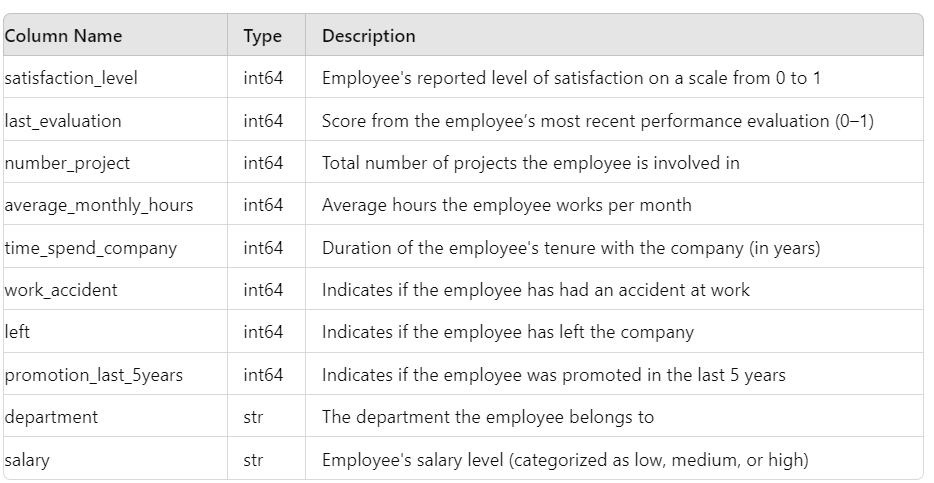

Now, let's import the necessary packages and explore the data.

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [ ]:
# Load dataset into a dataframe
df = pd.read_csv("Salifort_HR_dataset.csv")

# Display first few rows of the dataframe
df.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Gather basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Check for missing values
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns

df = df.rename(columns={'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'tenure',
                        'Work_accident': 'work_accident',
                        'Department': 'department'})

# Display all column names after renaming

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
# Check for duplicates

df.duplicated().sum()

3008

In [ ]:
# View some duplicated rows

df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save dataframe as df1
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


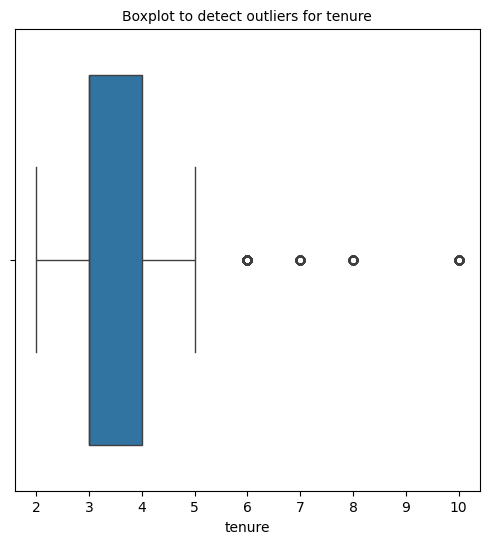

In [ ]:
# Create a boxplot to detect outliers for `tenure`
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.boxplot(x=df1['tenure'])
plt.show()

In [ ]:
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data with outliers in `tenure`:", len(outliers))

# Count proportion of outliers in 'tenure'
print("Proportion of rows in the data containing outliers in `tenure`:", (len(outliers)/len(df1))*100)


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data with outliers in `tenure`: 824
Proportion of rows in the data containing outliers in `tenure`: 6.8718205320657155


'Tenure' has 824 outliers. In other words, 6.87% of the tenure data contains outliers, indicating this is the percentage of data we would lose if we choose to remove these rows. Different models have varying sensitivities to outliers and based on the specific model we intend to use, we decided to remove these outliers.

# **Checking for outliers for 'satisfaction_level' and 'average_monthly_hours'**

Let us explore if there are outliers for other variables such as 'satisfaction_level' and 'average_monthly_hours'.

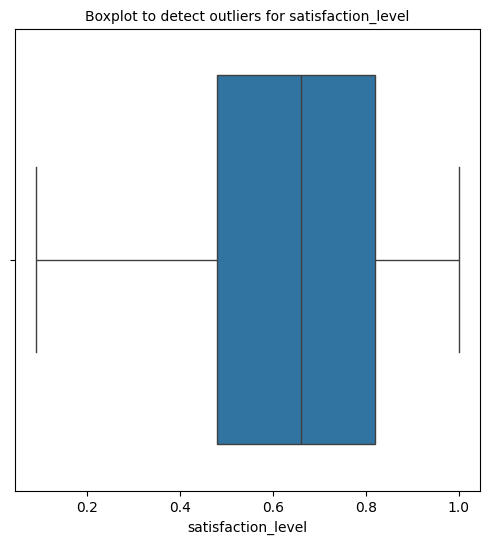

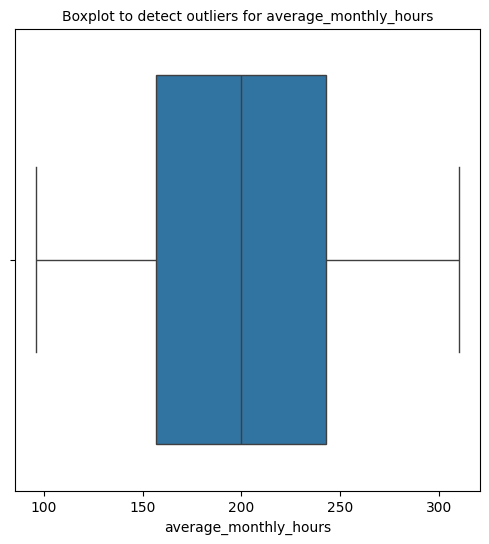

In [ ]:
# Create a boxplot to detect outliers for `satisfaction_level`
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for satisfaction_level', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.boxplot(x=df1['satisfaction_level'])
plt.show()

# Create a boxplot to detect outliers for `average_monthly_hours`
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for average_monthly_hours', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.boxplot(x=df1['average_monthly_hours'])
plt.show()

The boxplots above show no outliers for other variables such as 'satisfaction_level' and 'average_monthly_hours'.

# **Exploratory Data Analysis (EDA)**
Next, we will conduct Exploratory Data Analysis (EDA) to carefully analyse the dataset and uncover relationships between variables, as well as derive insights that will guide what models we will construct later.

Our goal is to predict the number of employees that will leave Salifort Motors, hence we will look at the dependent variable 'left_company'. We'll begin by looking at the proportion of employees who have left the company compared to the total number of employees at Salifort Motors.

In [ ]:
# Get numbers of employees who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of employees who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Around 16.6% of employees have left the company.

# **Resignations by Department**

Next, let us explore if certain departments have higher number of resignations.

             Counts  Percentages
department                      
sales          3239    27.011926
technical      2244    18.714036
support        1821    15.186390
IT              976     8.139438
RandD           694     5.787674
product_mng     686     5.720957
marketing       673     5.612543
accounting      621     5.178884
hr              601     5.012092
management      436     3.636060



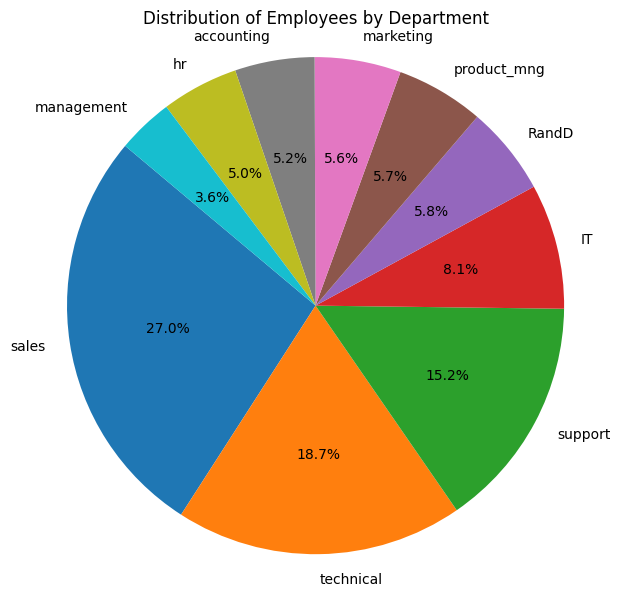

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Display counts and percentages for each department
department_counts = df1["department"].value_counts()
department_percentages = department_counts / len(df1) * 100
department_data = pd.concat([department_counts, department_percentages], axis=1)
department_data.columns = ['Counts', 'Percentages']
print(department_data)

# Print a blank line
print()

# Create a pie chart for department distribution
plt.figure(figsize=(12, 6))

# Pie chart for department distribution
plt.subplot(1, 2, 1)
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

From the pie chart above, we can see that most employees  work in the sales department (27%), followed by technical (18.7%) and support (15.2%) departments.


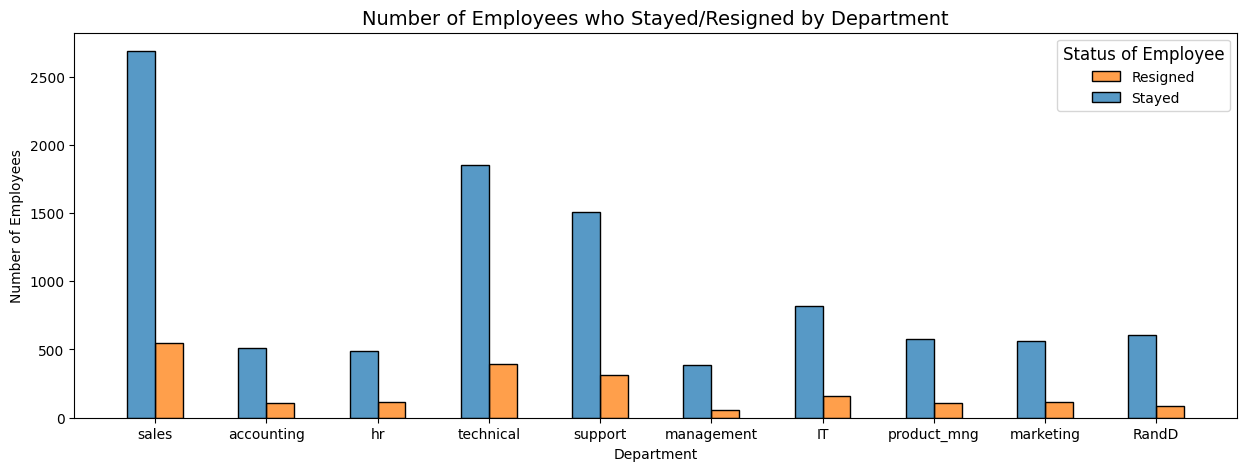

In [ ]:
# Compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(15,5))
sns.histplot(data=df1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='horizontal')
plt.title('Number of Employees who Stayed/Resigned by Department', fontsize=14)
plt.legend(title='Status of Employee', labels=['Resigned', 'Stayed'], title_fontsize='12', fontsize='10')
plt.xlabel('Department')
plt.ylabel('Number of Employees');

The bar chart clearly indicates that the number of employees who stayed (represented by the blue bars) is consistently higher than those who left (represented by the orange bars) across almost all departments. This trend suggests a **generally positive retention rate within the organisation.**

There is a significant disparity between departments, particularly highlighted by the sales department, which shows an exceptionally high number of employees who have stayed. This may indicate a favorable working environment or strong management practices within this department.

While most departments show more employees staying than leaving, the technical department reveals a higher turnover ratio relative to its size. This could signal potential issues with job satisfaction, workload, or work culture that may need to be addressed to improve retention.

Departments with fewer employees, such as marketing and RandD, show relatively low turnover, but their small size can skew the perception of stability. Further analysis would be needed to assess job satisfaction and retention in these smaller teams over time.

In [ ]:
# Create a table to show the number of employees that resigned in each department
department_left_table = pd.crosstab(index=df1['department'], columns=df1['left'])
department_left_table.columns = ['Stayed', 'Resigned']
department_left_table['Total'] = department_left_table.sum(axis=1)
department_left_table['Resigned (%)'] = (department_left_table['Resigned'] / department_left_table['Total']) * 100
department_left_table_sorted = department_left_table.sort_values(by='Resigned (%)', ascending=False)

# Print the sorted table
print(department_left_table_sorted)

             Stayed  Resigned  Total  Resigned (%)
department                                        
hr              488       113    601     18.801997
accounting      512       109    621     17.552335
technical      1854       390   2244     17.379679
support        1509       312   1821     17.133443
sales          2689       550   3239     16.980550
marketing       561       112    673     16.641902
IT              818       158    976     16.188525
product_mng     576       110    686     16.034985
RandD           609        85    694     12.247839
management      384        52    436     11.926606


As indicated in the table above, we can see that the human resources department (18.8%) saw the most resignation, while the management department (12%) had the least resignation. However, these differences are minor.

The proportions of employees who left across each department are relatively consistent. This suggests that the department itself is not a significant factor influencing employee departures. Therefore, Salifort Motors should address the issue more generally rather than focusing on individual departments. To gain more insights, it would be beneficial to assess employee satisfaction levels by department

# **Satisfaction Level by Department**

In [ ]:
# Calculate the average satisfaction level for each department
department_satisfaction_table = df1.groupby('department')['satisfaction_level'].mean().reset_index()
department_satisfaction_table.columns = ['Department', 'Avg Satisfaction Level']

# Sort the table in descending order
department_satisfaction_table = department_satisfaction_table.sort_values(by='Avg Satisfaction Level', ascending=False)
print(department_satisfaction_table)

# Print a line break
print("\n")  # This creates a line break between the two outputs

# Create a pivot table with average satisfaction level for employees who left and stayed, grouped by department
department_satisfaction_table = df1.pivot_table(index='department', columns='left', values='satisfaction_level', aggfunc='mean')
department_satisfaction_table.columns = ['Stayed', 'Resigned']

# Sort the table in descending order by the 'Stayed' column
department_satisfaction_table = department_satisfaction_table.sort_values(by='Stayed', ascending=False)
print(department_satisfaction_table)

    Department  Avg Satisfaction Level
8      support                0.634822
5    marketing                0.634770
0           IT                0.634016
4   management                0.631995
7        sales                0.631349
6  product_mng                0.629825
9    technical                0.627937
1        RandD                0.627176
3           hr                0.621947
2   accounting                0.607939


               Stayed  Resigned
department                     
IT           0.675917  0.417089
support      0.672724  0.451506
marketing    0.670784  0.454375
technical    0.669806  0.428897
sales        0.668360  0.450400
hr           0.668135  0.422478
product_mng  0.660747  0.467909
management   0.658542  0.435962
RandD        0.654204  0.433529
accounting   0.649082  0.414679


The average satisfaction levels for employees are comparable across all departments. Both those who stayed and those who left exhibit similar satisfaction levels, reinforcing our conclusion that  department is not a significant factor influencing employee departures.


# **Does employees' level of satisfaction affect the decision to resign from the company?**

To predict future attrition of employees, We will start by examining the relationships between the variables. One of the primary factors that likely influences an employee's decision to leave or stay is their level of satisfaction.

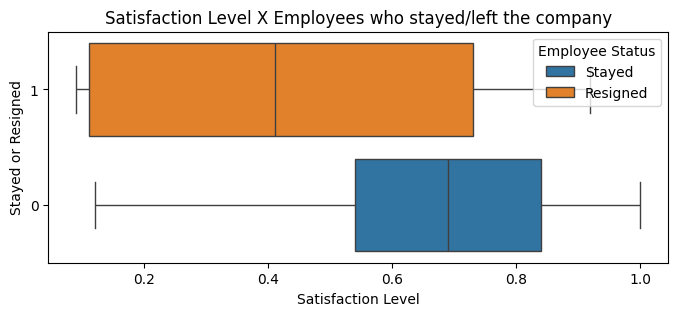

In [ ]:
# Create boxplot showing distributions of 'satisfaction_level' by 'left_company'
plt.figure(figsize=(8, 3))

boxplot = sns.boxplot(data=df1, x='satisfaction_level', y='left', orient="h", hue='left')
plt.gca().invert_yaxis()
plt.title('Satisfaction Level X Employees who stayed/left the company', fontsize=12)
plt.xlabel('Satisfaction Level')
plt.ylabel('Stayed or Resigned')

# Customize the legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles, ['Stayed', 'Resigned'], title='Employee Status', loc='upper right')

plt.show()

Our boxplot suggests that satisfaction levels does affect whether an employee will stay or leave, as those who remained with the company (blue box) generally reported higher satisfaction. However, it's important to note that some satisfied employees still chose to leave (orange box), indicating that other factors also lead to employees resigning.


**Relationship between Tenure and Satisfaction Level**

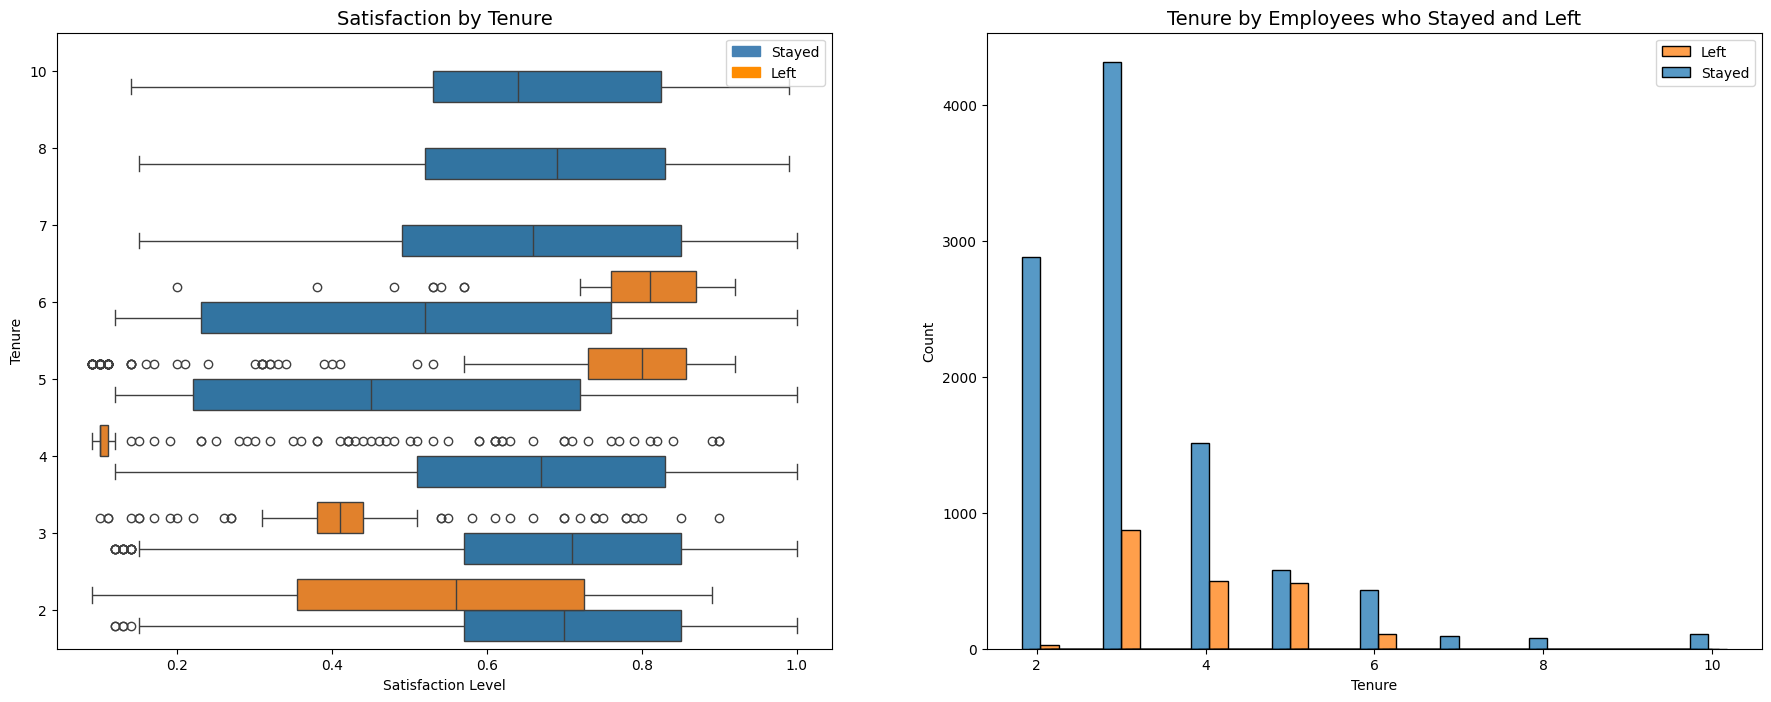

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize=14)
legend = ax[0].legend()
legend.texts[0].set_text('Stayed')
legend.texts[1].set_text('Left')
legend.legend_handles[0].set_color('steelblue')
legend.legend_handles[1].set_color('darkorange')
ax[0].set_xlabel('Satisfaction Level')
ax[0].set_ylabel('Tenure')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].legend(labels=['Left', 'Stayed'])
ax[1].set_xlabel('Tenure')
ax[1].set_title('Tenure by Employees who Stayed and Left', fontsize=14)

plt.show()

*   The majority of employees have a tenure of 2-4 years, with a significant number staying in that range. The employee count drops significantly for those with tenures exceeding 4 years.
*   The high count of employees who stayed compared to those who left emphasises retention during the initial years. However, as tenure increases, the count for those who left appears relatively low, indicating that employees with higher tenure are often satisfied enough to remain.
*   Employees with tenure of 7 years or more did not leave the organisation
*   A group of employees who left the company were generally dissatisfied with their jobs and had shorter tenures, ranging from 2 to 4 years. In contrast, there was another group that departed despite being satisfied and having longer tenures of 5 to 6 years.
*   The highest rates of turnover were observed among employees with 3 to 6 years of tenure, with nearly half of the 5-year tenured employees having left.
*   It is recommended that Salifort Motors think of how to engage employees with tenure of 4 to 6-year to enhance their satisfaction levels which can help in retention.









# **Relationship between Tenure and Salary**

Another factor that may affect whether an employee stays or leave a company is their salary. Let us see whether there is a relationship between tenure and salary.


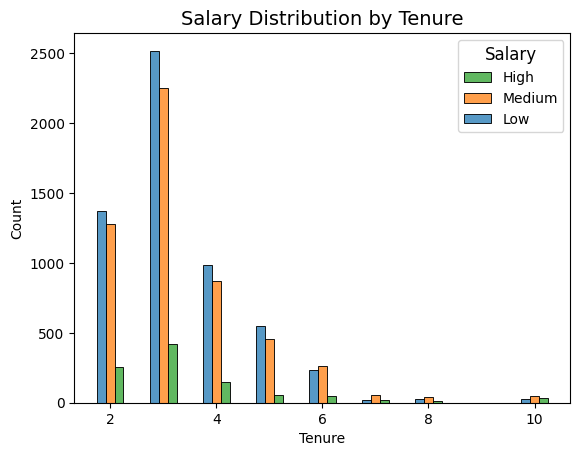

In [ ]:
# Plot Salary Distribution by Tenure
sns.histplot(data=df1, x='tenure', hue='salary', discrete=True,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
plt.legend(title='Salary', labels=['High', 'Medium', 'Low'], title_fontsize='12', fontsize='10')
plt.title('Salary Distribution by Tenure', fontsize=14)
plt.xlabel('Tenure')
plt.show()


The histogram displays the counts of employees across various tenures (measured in years) categorised by salary levels.

*   The highest number of employees stayed in the company for around 2 to 4 years.
*   **Low Salary**: The blue bars representing low salaries dominate the 2-year tenure category, indicating that a significant portion of employees starting in this period earn lower salaries
*   **Medium Salary**: The orange bars for medium salaries also show considerable counts, particularly in the 2- to 4-year range, implying a shift towards higher-paying positions as tenure increases.
*   **High Salary**: The green bars for high salaries are quite sparse, indicating that high salary levels are less common in this organisation, especially for those with shorter tenures.
*   As tenure increases beyond 4 years, the counts for high salaries remain low, suggesting that higher salaries may be rare even for longer-tenured employees.

Employees tend to earn low salaries in their early years, with some transition to medium salaries as they gain more experience. High salaries remain limited across all tenures.

# **Relationship between Salary and Satisfaction Levels**

Next, let's see if higher salaries lead to more satisfied employees.





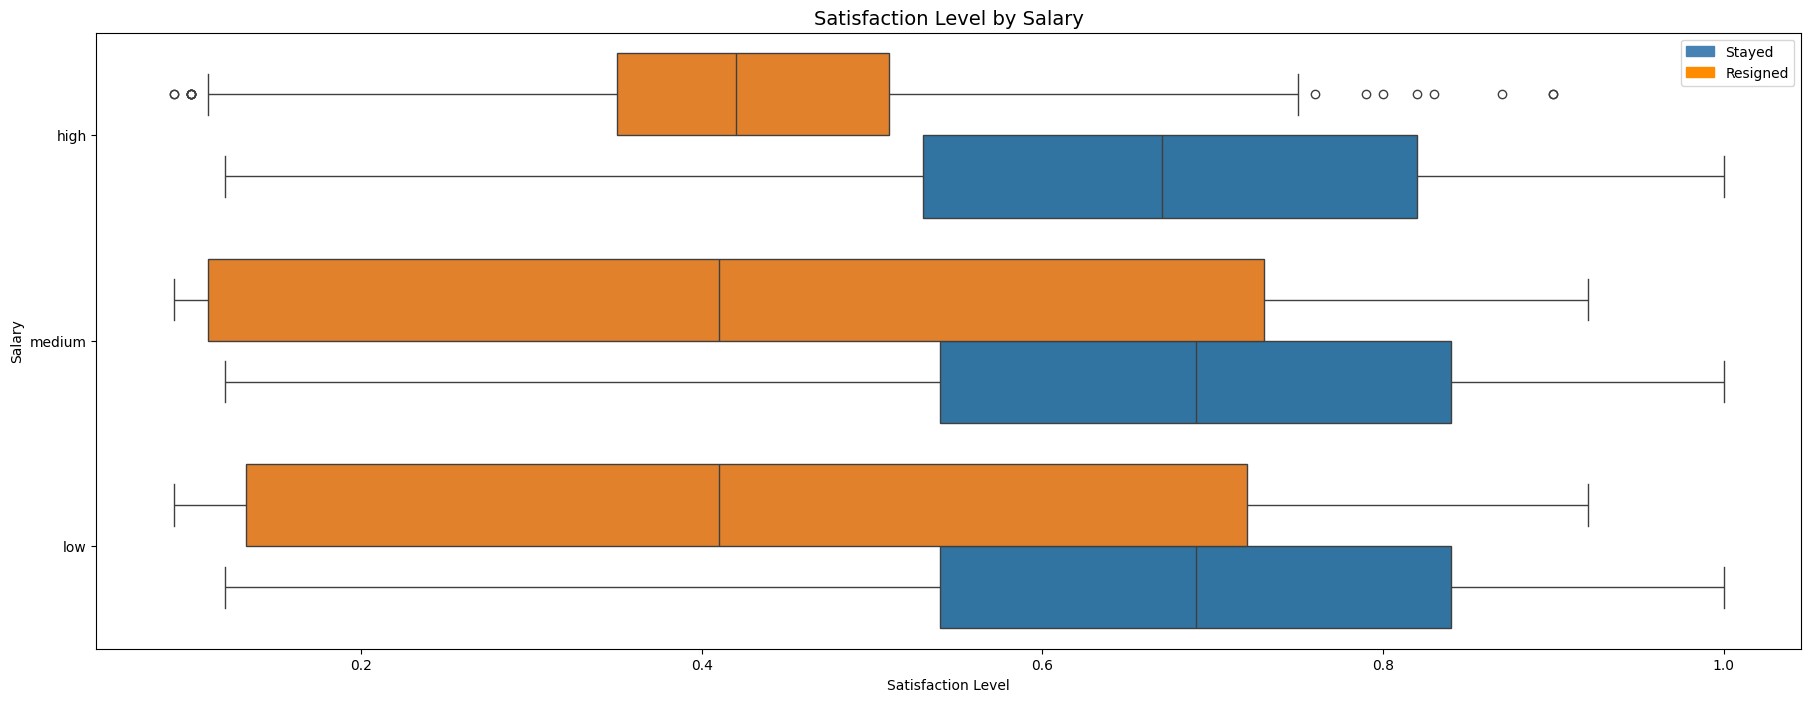

In [ ]:
# Create boxplot showing 'satisfaction_level' by 'salary', comparing employees who stayed versus those who resigned
plt.figure(figsize=(22, 8))

sns.boxplot(data=df1, x='satisfaction_level', y='salary', hue='left', orient="h")
plt.gca().invert_yaxis()
plt.title('Satisfaction Level by Salary', fontsize=14)
legend = plt.legend()
legend.texts[0].set_text('Stayed')
legend.texts[1].set_text('Resigned')
legend.legend_handles[0].set_color('steelblue')
legend.legend_handles[1].set_color('darkorange')
plt.xlabel('Satisfaction Level')
plt.ylabel('Salary')

plt.show()

The chart provides insights into the relationship between employees' salary levels and their job satisfaction, categorized by whether they stayed with the company or left.

**Comparison of Groups:**

*   *Stayed (blue)*:Higher satisfaction levels are evident, particularly in the high salary category. The box is significantly to the right, indicating that many employees who stayed reported higher satisfaction.
*   *Left (orange)*: There is a noticeable trend of lower satisfaction levels among those who left, especially in the high and medium salary categories. The box is situated lower on the satisfaction level axis.

**Outliers:**

*   The chart indicates potential outliers (noted by points beyond the whiskers), particularly among employees who left. This suggests some individuals had very low satisfaction levels even within higher salary brackets.

**General Trends:**

*   *High Salary*: Employees in this category who stayed reported the highest satisfaction levels, while those who left had notably lower satisfaction.
*   *Medium and Low Salaries*: The differences in satisfaction are less pronounced, but overall, stayed employees have higher satisfaction than those who left.


The chart illustrates a clear correlation between salary and satisfaction, suggesting that higher salaries are associated with higher satisfaction for employees who remained with the company. Conversely, employees who left generally reported lower satisfaction, Despite higher salaries, some employees still chose to leave the organisation, possibly due to factors unrelated to salary.

# **Relationship between Salary and Decision to Stay or Resign**

Further to the analysis above, let's explore whether salaries influence employees' decisions to leave the company.

In [ ]:
# Table to show relationship between salary and employees that resigned
salary_left_table = pd.crosstab(index=df1['salary'], columns=df1['left'])
salary_left_table.columns = ['Stayed', 'Resigned']
salary_left_table['Total'] = salary_left_table.sum(axis=1)
salary_left_table['% of Resigned'] = (salary_left_table['Resigned'] / salary_left_table['Total']) * 100
salary_left_table = salary_left_table.sort_values(by='% of Resigned', ascending=False)
print(salary_left_table)

        Stayed  Resigned  Total  % of Resigned
salary                                        
low       4566      1174   5740      20.452962
medium    4492       769   5261      14.616993
high       942        48    990       4.848485


The results in the table above shows that salaries do affect employees’ decision whether to stay or resign. 20.5% of employees with low salaries left the organisation, while only 4.9% of  employees with high salaries left.


# **Correlation between average monthly hours, number of projects and resignations by employees**

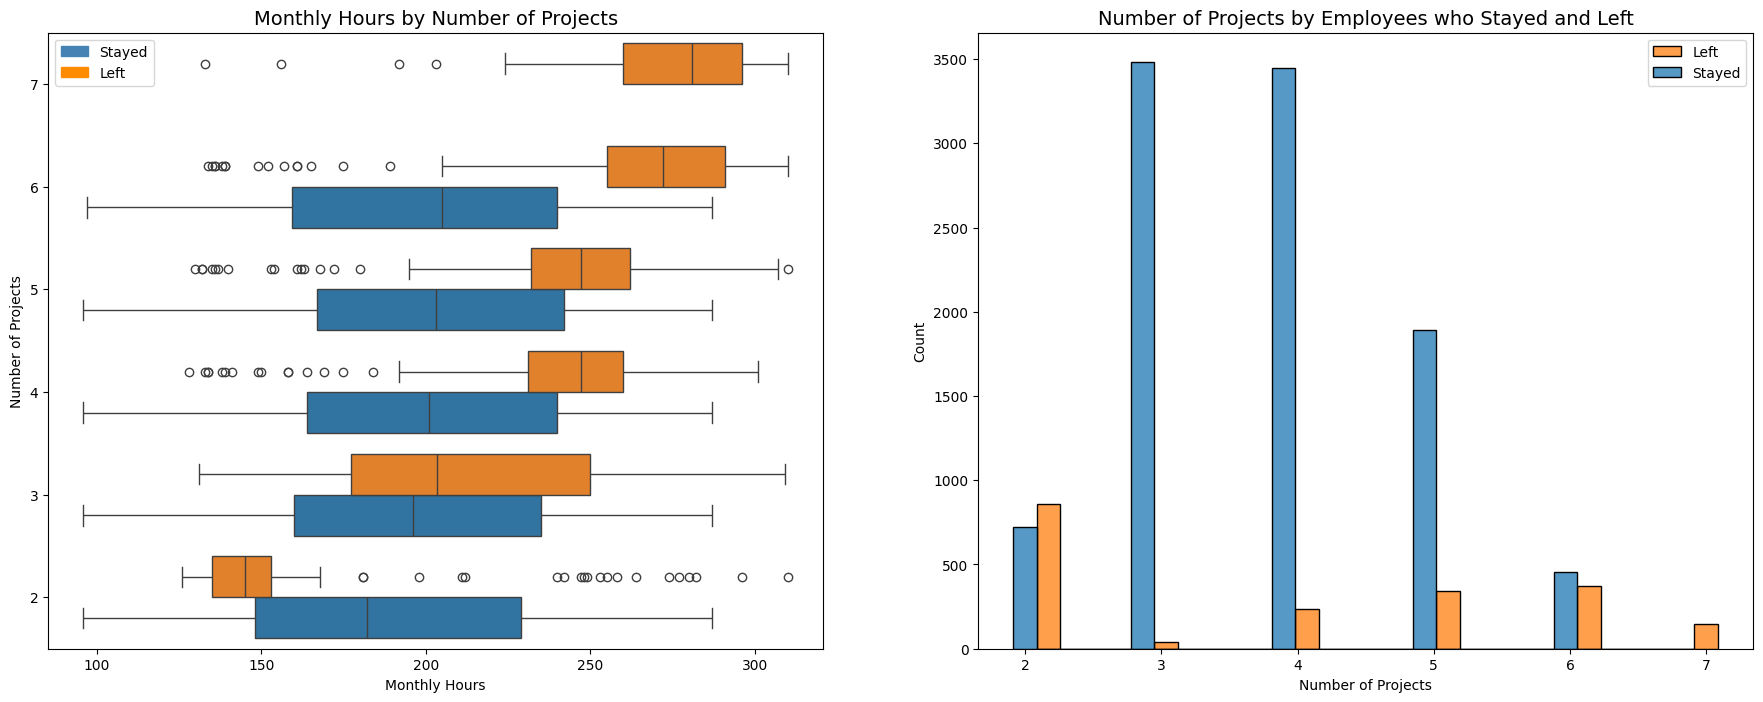

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` X `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', hue_order=[0, 1], orient="h", ax=ax[0])
legend = ax[0].legend()
legend.texts[0].set_text('Stayed')
legend.texts[1].set_text('Left')
legend.legend_handles[0].set_color('steelblue')
legend.legend_handles[1].set_color('darkorange')
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)
ax[0].set_xlabel('Monthly Hours')
ax[0].set_ylabel('Number of Projects')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].legend(labels=['Left', 'Stayed'])
ax[1].set_title('Number of Projects by Employees who Stayed and Left', fontsize=14)
ax[1].set_xlabel('Number of Projects')

plt.show()

**Correlation Coefficient:**

The correlation coefficient between monthly_hours and number_projects is approximately 0.33. This value indicates a moderate positive correlation. This means that, generally, as the number of monthly hours increases, the number of projects also tends to increase, though this relationship is not very strong.

**Employee Workloads:**
*   Employees involved in more than 2 projects, particularly those with 4 or more, typically worked significantly more hours than their counterparts who stayed. This suggests that some employees may have quit due to being overworked and burned out.

**Average Hours by Project Count:**
*   There was little difference in average monthly hours between employees working on 4 and 5 projects for both those who left and those who stayed.
*   All employees assigned to 7 projects resigned from the company, and those working on 6-7 projects logged between 260-290 hours, which is considerably higher than other groups.

**Overwork Indicator:**
*   Employees who remained at the company generally worked between 160-240 hours per month, regardless of the number of projects, with those on 2 projects working slightly fewer hours.
*   Considering a standard of roughly 167 hours per month, most employees—regardless of project count—are often overworked, especially those handling more than 2 projects.
*   The increase in mean hours for employees with more projects was notably higher for those who left, reinforcing the idea that departing employees were significantly overburdened.

**Optimal Project Count:**
*   The optimal range for project assignments seems to be 3-4 projects, as these groups had the lowest turnover rates.
*   High turnover is associated with 6 and 7 projects, indicating that the organisation should look into reducing the number of projects each employee manages to avoid overloading them.






# **Does working more hours lead to promotion?**

Correlation Coefficient:  -0.004963519712411699


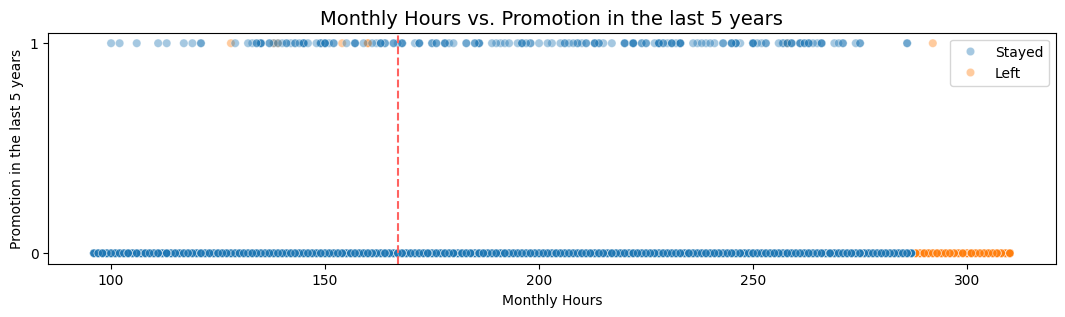

In [ ]:
# Create plot to examine relationship between 'monthly_hours' and 'promoted'
plt.figure(figsize=(13, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=167, color='#ff6361', ls='--')
legend = plt.legend()
legend.texts[0].set_text('Stayed')
legend.texts[1].set_text('Left')
legend.legend_handles[0].set_color('steelblue')
legend.legend_handles[1].set_color('darkorange')
plt.title('Monthly Hours vs. Promotion in the last 5 years', fontsize='14')
plt.xlabel('Monthly Hours')
plt.ylabel('Promotion in the last 5 years')
plt.yticks([0, 1]);

# Calculate the Correlation Coefficient
correlation_coefficient = df1['average_monthly_hours'].corr(df1['promotion_last_5years'])
print('Correlation Coefficient: ', correlation_coefficient)

*   Most employees who left the company were not promoted in the last five years, indicating that recent promotions are a significant factor in their decision to stay or leave.
*   The largest group of departing employees were those working the most hours without receiving promotions. This suggests that Salifort Motors should consider rewarding dedicated employees with promotions, or they risk losing them.



# **Relationship between Tenure and Promotion**

In [ ]:
# Create a table for tenure by promotion
promotion_tenure_table = pd.crosstab(df1['tenure'], df1['promotion_last_5years'])
promotion_tenure_table.columns = ['Not Promoted', 'Promoted']
row_sum = promotion_tenure_table.sum(axis=1)
promotion_tenure_table['Promoted (%)'] = (promotion_tenure_table['Promoted'] / row_sum) * 100
print(promotion_tenure_table)

# Create a table for promotion and left company
promotion_tenure_table = pd.crosstab(index=df1['tenure'], columns=[df1['promotion_last_5years'], df1['left']])
promotion_tenure_table = promotion_tenure_table.xs(1, level='left', axis=1)
promotion_tenure_table.columns = ['Not Promoted & Left Company', 'Promoted & Left Company']
print(promotion_tenure_table)


        Not Promoted  Promoted  Promoted (%)
tenure                                      
2               2871        39      1.340206
3               5101        89      1.714836
4               1983        22      1.097257
5               1051        11      1.035782
6                531        11      2.029520
7                 76        18     19.148936
8                 76         5      6.172840
10                99         8      7.476636
        Not Promoted & Left Company  Promoted & Left Company
tenure                                                      
2                                31                        0
3                               868                        6
4                               494                        1
5                               481                        1
6                               109                        0
7                                 0                        0
8                                 0                        0
1

*   Employees with 7 years of tenure had the highest proportion of promotion (19.15%). For employees with tenure lesser than 6 years, promotions are rare, with very low promotion percentages (e.g., 2 years: 1.34% and 3 years: 1.71%).
*   A stark trend emerges where the majority of employees who left the company have not been promoted over the last five years. This highlights a potential dissatisfaction leading to turnover.
*   A stark trend emerges where the majority of employees who left the company were those that have not been promoted over the last five years. This highlights a potential dissatisfaction leading to turnover.
*   The highest number of departures is among those with 3 years of tenure—most of whom were not promoted. This is followed closely by employees with 4 and 5 years of tenure.






# **Construct**

After analysing the data, we can start constructing our model. The objective is to predict whether an employee leaves the company, which represents a categorical outcome variable. This task is classified as a binary classification problem, as the outcome can either be 1 (indicating the employee left) or 0 (indicating the employee did not leave).

Given that the target variable is categorical, a Logistic Regression model or a Tree-based Machine Learning model would be suitable for this project.

# **Logistic Regression model**

Before splitting the data, we will need to encode the non-numeric variables. There are two such variables: *department and salary.*

The *department* variable is categorical, so you can create dummy variables for it in the modeling process.

On the other hand, *salary* is also categorical but is ordinal. Since there is a hierarchy among the categories, it's more effective to convert this variable to numerical values, assigning levels from 0 to 2, rather than creating dummy variables.

In [ ]:
# Copy the dataframe
df_encode = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_encode['salary'] = (
    df_encode['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_encode = pd.get_dummies(df_encode, drop_first=False)

# Display the new dataframe
df_encode.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


As logistic regression is sensitive to outliers, we will remove the outliers in the tenure column that were previously identified.

In [ ]:
# Select rows without outliers in 'tenure'
df_reg = df_encode[(df_encode['tenure'] >= lower_limit) & (df_encode['tenure'] <= upper_limit)]
df_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


To effectively analyse employee turnover, we will need to develop a predictive model that can assess the likelihood of an employee leaving the company. Before constructing this model, we first need to clearly define the outcome variable, which in this case is whether an employee has left the company.

By isolating this variable, we can identify the relevant features that influence turnover. Once the features are selected, we proceed to split the dataset into training and testing sets to ensure our model can generalize well to new data. We fit the logistic regression model to the training data and use it to make predictions on the test set, allowing us to evaluate the model's performance in forecasting employee departures.

In [ ]:
# Isolate the outcome variable
y = df_reg['left']

# Select the features to use in the model
X = df_reg.drop('left', axis=1)

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23)

# Construct a logistic regression model and fit it to the training dataset
log_reg = LogisticRegression(random_state=23, max_iter=750).fit(X_train, y_train)

# Use the logistic regression model to get predictions on the test set
y_pred = log_reg.predict(X_test)

Next, we will plot the confusion matrix to evaluate the model and its performance on the test set.

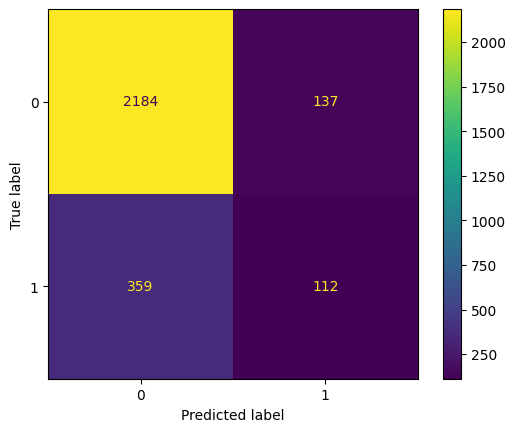

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_reg.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The confusion matrix provides a detailed breakdown of the model's performance in predicting employee departures based on the binary outcome variable (0 = did not leave, 1 = left).

*   **True Negatives** (TN): 2184 - The model correctly identified employees who did not leave, indicating strong performance in this area.
*   **False Positives** (FP): 137 - The model incorrectly predicted that some employees left when they did not, suggesting potential misclassification.
*   **False Negatives** (FN): 359 - The model failed to identify employees who left, reflecting missed opportunities for retention strategies.
*   **True Positives** (TP): 112 - The model accurately predicted employees who left, though this number is lower than the others, showing room for improvement in identifying actual leavers.









We will move on to evaluate the class balance in the dataset by examining the value counts in the "left" column. As this is a binary classification task, understanding the class balance is essential for interpreting accuracy metrics effectively.

In [ ]:
# Check the class balance in the data
df_reg['left'].value_counts(normalize=True)

,proportion
left,
0,0.831468
1,0.168532


The data is imbalanced, though not excessively so. In our regression model dataset, approximately 16.85% of employees left the company, resulting in a distribution of about 83% non-leavers and 17% leavers. Since this level of imbalance is manageable (close to 20% for the less frequent class), we can move forward with building and evaluating the model without making adjustments to the balance.

In [ ]:
# Create classification report for logistic regression model
rows_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=rows_names))

              precision    recall  f1-score   support

      Stayed       0.86      0.94      0.90      2321
        Left       0.45      0.24      0.31       471

    accuracy                           0.82      2792
   macro avg       0.65      0.59      0.60      2792
weighted avg       0.79      0.82      0.80      2792



*   The classification report reveals that the model performs well in predicting employees who stayed, achieving a precision of 0.86 and a recall of 0.94, resulting in an F1-score of 0.90.
*   However, it struggles with predicting leavers, with a precision of only 0.45 and a recall of 0.24, leading to a low F1-score of 0.31.
*   Overall, the model has an accuracy of 82%, which is mainly driven by its strong performance in the majority class (Stayed). The macro averages indicate a less favorable performance, with precision at 0.65 and recall at 0.59, highlighting the need for improvement in predicting the minority class.
*   The weighted averages, influenced by class support, show better values of 0.79 for precision and 0.82 for recall, but underscore the significant disparity in the model's effectiveness across the two classes. This suggests that additional strategies may be necessary to enhance detection of employees who left.




  

# **Decision Tree Model**

Next, we'll implement a Decision Tree. While decision trees are relatively robust against outliers, we will train and test using data without outliers to maintain consistency and ensure a fair comparison of performance between our models.

This approach will include the implementation of both Decision Tree, Random Forest and XGBoost.

In [ ]:
# Isolate the outcome variable
y = df_reg['left']

# Select the features you want to use in your model
X = df_reg.drop('left', axis=1)

In [ ]:
# Split the data into training, validating, and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23)

Next, we will build a decision tree model and configure a cross-validated grid search to thoroughly explore the optimal model parameters.

In [ ]:
# Instantiate the model
dec_tree = DecisionTreeClassifier(random_state=23)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth': [3, 4, 6, 8, None],
    'min_samples_leaf': [1, 3, 5, 8, 15],
    'min_samples_split': [2, 5, 10, 25, 50, 100, 200]
}

# Assign scoring metrics as a list
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
decision_tree = GridSearchCV(dec_tree, cv_params, scoring=scoring, cv=5, refit='f1')

# Fit the model
decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [3, 4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5, 8, 15],
                         'min_samples_split': [2, 5, 10, 25, 50, 100, 200]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
%%time
decision_tree.fit(X_train, y_train)

CPU times: user 33.5 s, sys: 77.4 ms, total: 33.6 s
Wall time: 34.1 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [3, 4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5, 8, 15],
                         'min_samples_split': [2, 5, 10, 25, 50, 100, 200]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best parameters
decision_tree.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 100}

In [ ]:
# Check best AUC score on CV
decision_tree.best_score_

0.9520768937825415

The high AUC score of 0.95 demonstrates that the model effectively predicts both employees who will leave and those who will stay.

We also want to examine the other performance metrics, so we will create a function to retrieve them from the grid search results.

In [ ]:
# Define function to get all the relevant metrics of the optimum model
def metrics_optimum(name:str, model, metric:str):
    '''
    Arguments:
        name (string): what you want the model to be called in the output table
        model: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the Precision, Recall, Accuracy, and AUC scores for
    the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1-score': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                        })

    return table

In [ ]:
# Get all cross-validation scores
decision_tree_cv_results = metrics_optimum('Decision Tree', decision_tree, 'f1')
decision_tree_cv_results

,Model,Precision,Recall,F1-score,Accuracy,AUC
0,Decision Tree,0.99159,0.915678,0.952077,0.984478,0.975904


# **Random Forest**

Strong scores from the decision tree model indicate good performance, but decision trees can be prone to overfitting. To address this, it's advisable to create a random forest for comparison, as it combines multiple trees to enhance prediction accuracy and reduce overfitting.

For the random forest model, we will also employ cross-validation and grid search to identify the optimal hyperparameters. We'll specify additional hyperparameters, including the maximum number of features for each tree, the maximum number of samples drawn from the dataset for each base learner, and the number of trees in the ensemble.


In [ ]:
# Instantiate the model
rf = RandomForestClassifier(random_state=23)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500]
}

# Assign scoring metrics as a list
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
# Fit the random forest model to the training data.
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

 As the model training took over 29 minutes, it is advisable to "pickle" and save the model. By doing so, we can preserve the model's state and avoid having to retrain it in the future, which saves time and computational resources.

In [ ]:
# Define a path to the folder where you want to save the model
path = r'C:\Users\Cheryl The Cute\Documents\Coding notes\Python'

# Define function to pickle the model
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: the model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

# Define function to read in the model
def read_pickle(path, saved_model:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model:      filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [ ]:
# Write pickle
write_pickle(path, rf1, 'random_forest_model')

In [ ]:
# Read pickle
rf1 = read_pickle(path, 'random_forest_model')

In [ ]:
# Check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

The maximum depth of the decision trees is set to 5, which helps to prevent overfitting by limiting the model's ability to capture intricate patterns in the training data. The proportion of samples used to train each individual tree is set to 70%, which can improve the model's robustness and reduce the impact of outliers. The minimum number of samples required to split an internal node and to be at a leaf node are set to 2 and 3, respectively, further contributing to the model's simplicity and ability to generalize. Finally, the number of trees in the random forest is set to 500, which is a relatively high value that can enhance the model's predictive performance.

In [ ]:
# Check best F1-score on Cross-validation
rf1.best_score_

0.9831100840866526

This high score of 0.98 indicates that the model performs exceedingly well in balancing precision and recall. Specifically, it suggests that the random forest model is highly effective at correctly identifying positive instances while minimizing false positives and false negatives. Overall, this score reflects strong predictive performance and indicates the model's reliability in making accurate predictions.

# **Did Decision Tree or Random Forest perform better as a model?**

The evaluation scores for the decision tree and random forest models will provide a basis for comparison. By analyzing these scores, we can determine which model performs better overall, taking into account both performance metrics and computational cost, to select the final model for use.

In [ ]:
# Get all cross-validation scores for both tree-based models
random_forest_cv_results = metrics_optimum('Random Forest', rf1, 'f1')

# Concatenate the dataframes along the rows axis
combined_results = pd.concat([decision_tree_cv_results, random_forest_cv_results], axis=0)

# Display the combined results
print(combined_results)

           Model  Precision    Recall  F1-score  Accuracy       AUC
0  Decision Tree   0.991590  0.915678  0.952077  0.984478  0.975904
0  Random Forest   0.981279  0.917781  0.948384  0.983164  0.976865


When comparing the decision tree and random forest models, the decision tree shows slightly better precision at 0.9915 compared to the random forest's 0.9812, indicating it is better at identifying positive instances.

However, the random forest has a marginally higher recall of 0.9177, capturing more actual positive cases. Decision Tree had a higher F-1 score of 0.9520. Both models achieve similar accuracy scores of 0.98, reflecting their balanced performance.

Random Forest and Decision Tree boasts a superior AUC of 0.9759 and 0.9769 respectively. **Taking into account the negligible differences in performance between both models and that the Decision Tree is faster in predicting real-time, we will choose Decision Tree as our selected model.**

We will now score the Decision Tree model on the test set.

In [ ]:
def test_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: Dataframe of Precision, Recall, F1, Accuracy, and AUC scores for the model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1-score': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [ ]:
# Get evaluation scores for the selected model's predictions on test data
decision_tree_test_scores = test_scores('Decision Tree Test', decision_tree, X_test, y_test)
decision_tree_test_scores

,Model,Precision,Recall,F1-score,Accuracy,AUC
0,Decision Tree Test,0.997717,0.927813,0.961496,0.987464,0.963691


The evaluation results for the "Decision Tree Test" model demonstrate its strong performance on the test data. The model achieved a precision of 0.997717, indicating a high proportion of its positive predictions are accurate.

Its recall of 0.928713 shows the model is able to correctly identify a large majority of the actual positive instances.

The F1-score of 0.961496 reflects an excellent balance between precision and recall, while the overall accuracy of 0.987464 indicates the model makes correct predictions most of the time.

Additionally, the AUC of 0.963691 suggests the model has a high discriminative power, effectively distinguishing between positive and negative classes.

**Overall, these metrics paint a picture of a highly capable model that is well-suited for the task at hand, with the ability to make accurate and reliable predictions on new, unseen data.**

Now, we will plot a confusion matrix to see how well it predicts on the test set.

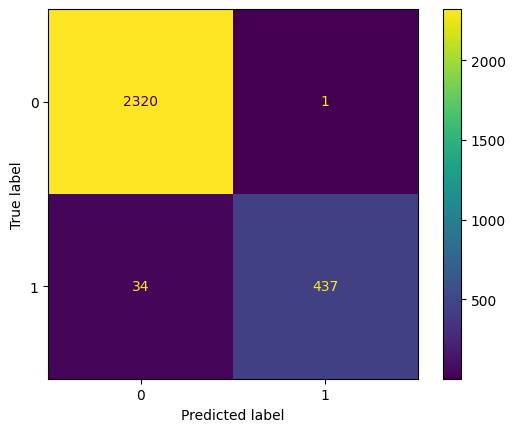

In [ ]:
# Generate array of values for confusion matrix
predictions = decision_tree.best_estimator_.predict(X_test)
tree_cm = confusion_matrix(y_test, predictions, labels=decision_tree.classes_)

# Plot confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm,
                             display_labels=decision_tree.classes_)
tree_disp.plot(values_format='');

*   The model correctly identified 2,320 employees who stayed (indicated by 0) and 437 employees who left (indicated by 1). This indicates the model has strong predictive power in distinguishing between employees who remained at the organization versus those who departed.
*   However, the model also misclassified 34 employees who stayed as having left (false positive), and 1 employee who left as having stayed (false negative). These misclassifications, while relatively low in number, suggest the model may still have some room for improvement in accurately identifying employee retention and turnover.
*   Overall, the high number of correct predictions for both staying and leaving employees indicates the model is performing well in this application. The low rates of false positives and false negatives further reinforce the model's ability to reliably predict employee retention and turnover based on the test data.


Now, we will plot a Decision Tree to find out the significant factors that impact the decision of employees to stay or leave Salifort Motors.

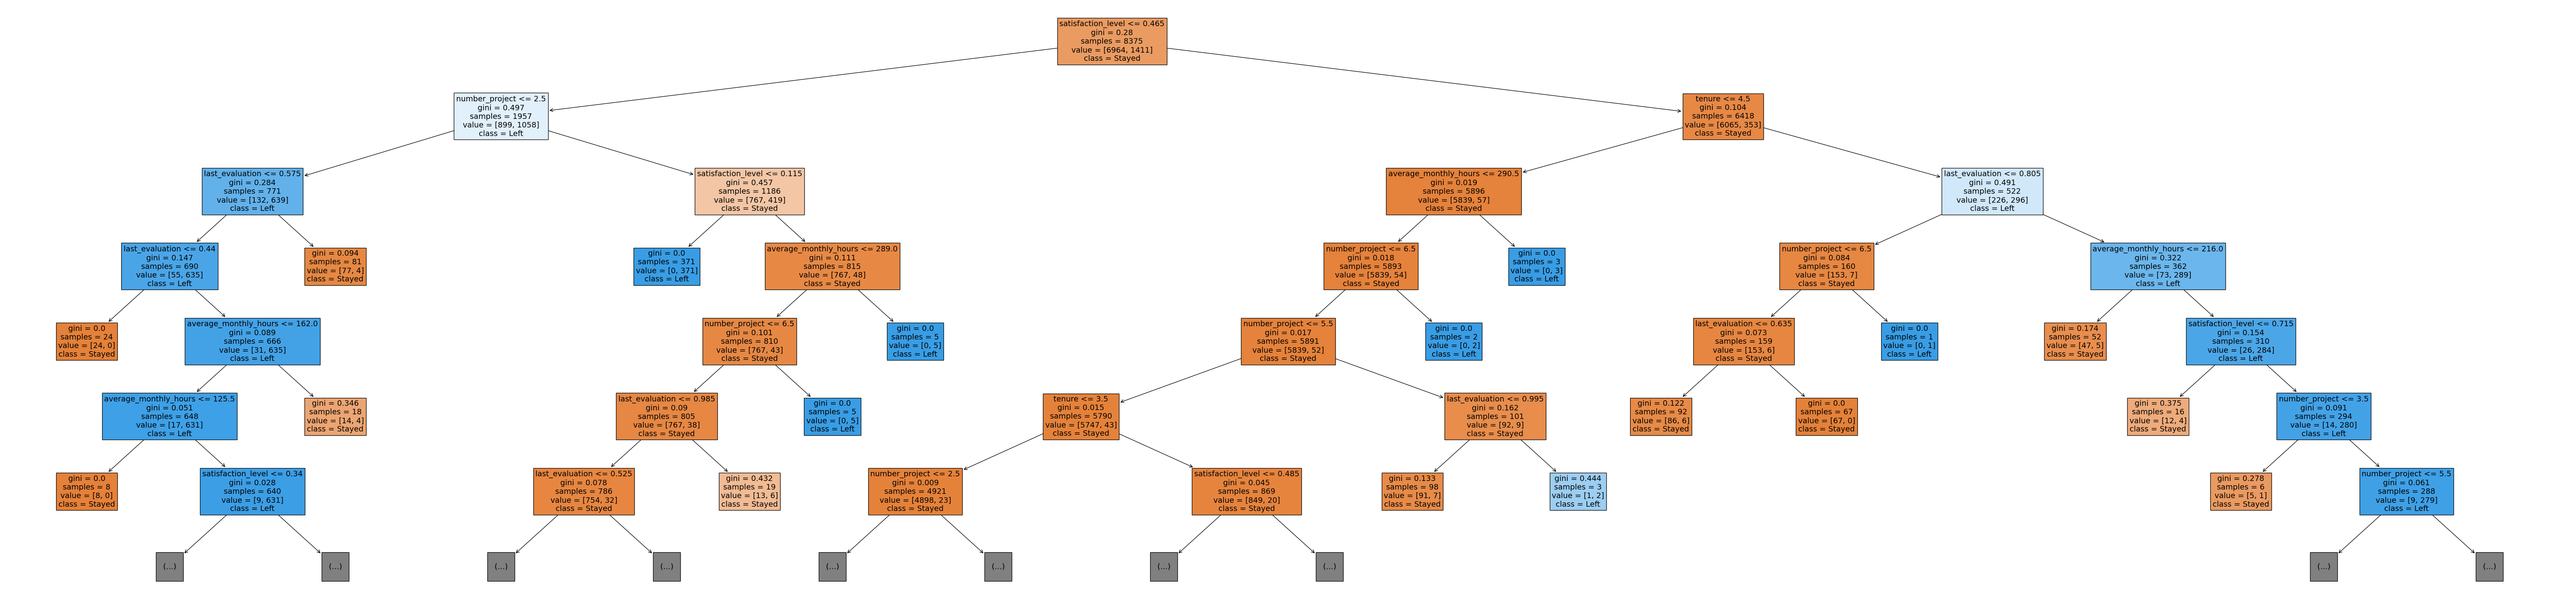

In [ ]:
# Plot the decision tree
plt.figure(figsize=(85,20))
plot_tree(decision_tree.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'Stayed', 1:'Left'}, filled=True)
plt.show()

*   The decision tree shows that employee's level of job satisfaction is the primary driver in predicting whether they will remain with the company or leave.
*   The first split in the tree is based on the number of projects the employee is working on. This indicates that the workload or number of concurrent projects an employee is involved in is also a significant factor in their decision to stay or leave.
*   The next level of the tree further splits the data based on the employee's tenure with the company.
*   The final levels of the tree introduce additional features like the employee's performance rating and the number of monthly hours worked. These factors likely provide further refinement in distinguishing between employees who stayed versus those who left.


To understand which factors are most influential in determining whether an employee will stay or leave the organization, we will analyze the **Gini importance** of the model's input features.

Gini importance provides insights into the relative contribution of each feature towards the model's predictive accuracy. Features with higher Gini importance scores are considered more influential in distinguishing between employees who stayed versus those who left.

By sorting the features based on their Gini importance values, we can identify the most impactful factors driving employee turnover. These high-importance features are the ones that should be given the most consideration, as they are the key drivers that the model is using to make its predictions.

In [ ]:
# Get the gini_importance for the decision tree
gini_importance = pd.DataFrame(decision_tree.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
gini_importance = gini_importance.sort_values(by='gini_importance', ascending=False)

# Extract features with importances greater than 0
gini_importance = gini_importance[gini_importance['gini_importance'] != 0]
gini_importance

# Barplot of the feature importances
sns.barplot(data=gini_importance, x="gini_importance", y=gini_importance.index, orient='h')
plt.title("Feature Importances of the Decision Tree for Employees Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

,gini_importance
satisfaction_level,0.559345
tenure,0.140957
last_evaluation,0.134639
number_project,0.112873
average_monthly_hours,0.051868
salary,0.000181
work_accident,0.000136


Based on the Gini importance values provided, we can summarize the key drivers of employee retention in this decision tree model.

*   **The most influential factor is the employee's satisfaction level**, with a Gini importance score of 0.559345. This suggests that an employee's level of job satisfaction is the primary determinant in whether they choose to stay with or leave the organization.
*   The second most important feature is the employee's tenure, with a Gini importance of 0.140957, indicating that the length of time an individual has been with the company plays a significant role in their retention.
*   The third most influential factor is the employee's performance rating, with a Gini importance of 0.134639.
*   The number of projects an employee is working on, with a Gini importance of 0.112873, is the fourth most significant factor
*   The monthly hours worked by the employee, with a Gini importance of 0.051868, appears to be a less influential factor compared to the top features. Lastly, the employee's salary and any work-related accidents, with Gini importance scores close to 0, seem to contribute the least to the model's predictive power in this particular case.













# **Execute**

In this stage, we will summarise our analysis and provide recommendations for Salifort Motors stakeholders.

**Results summary of models**

1. **Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80%, and accuracy of 82%, on the test set.

2. **Random Forest**

The random forest achieved AUC of 97.7%, precision of 98.1%, recall of 91.8%, f1-score of 94.8%, and accuracy of 98.3%, on the test set.

3. ✅**Decision Tree**✅

The decision tree model achieved AUC of 97.6%, precision of 99.2%, recall of 91.6%, f1-score of 95.2%, and accuracy of 98.4%, on the test set.

The decision tree model was selected as the champion model over the random forest approach due to its comparable predictive performance and significantly lower computational cost.

The F1-score was chosen as the primary evaluation metric, as it balances precision and recall, which was important given the substantial costs associated with both false positives and false negatives for Salifort Motors.

The champion decision tree model demonstrated strong predictive capabilities, achieving a low false positive rate of 0.04% and a false negative rate of 1.22%. This indicates the model's ability to accurately identify employees at risk of leaving while minimizing costly misclassifications.

Additionally, the model's predicted attrition rate of 15.69% closely matched the actual attrition rate of 16.85% in the dataset, suggesting the model's ability to generalize well and capture the underlying patterns of employee turnover at Salifort Motors.

**Analysis of variables**
*   Employees who work longer hours and are involved in more projects are at a higher risk of leaving the company.
*   Employees who are performing well and striving for promotions, but are not receiving them, are more likely to leave. This indicates a disconnect between the company's performance evaluation and career development opportunities.
*   Employees who are engaged in 3-4 projects demonstrate lower turnover rates, suggesting an optimal balance between workload and job satisfaction. Overworked employees, particularly those working more than 215 monthly hours, are more likely to become dissatisfied and leave.
*   Employees with 3-6 years of tenure are the most susceptible to leaving, while longer-tenured employees are less likely to quit. This highlights the importance of focusing retention efforts on the mid-tenure employees.
*   Higher-paid employees are less likely to leave, indicating that competitive compensation is crucial for retaining talent.

**Recommendations to Salifort Motors**

Based on the key analysis provided, here are some recommendations for Salifort Motors:

1. Address Work-Life Balance and Workload:
*   Implement measures to monitor and manage employee workload, ensuring an optimal balance between project involvement and monthly hours worked.
*   Consider capping the maximum monthly hours worked to 215 hours and below, as employees within this range demonstrated lower turnover rates.
*   Provide more support and resources to employees working on 3 or more projects to help them maintain a healthy work-life balance.

2. Enhance Career Development Opportunities:
*  Reevaluate the performance evaluation system to focus on overall productivity and effectiveness rather than just longer working hours.
*  Improve transparency and clarity around promotion and career advancement opportunities, especially for high-performing employees who are seeking growth within the organization.
*  Implement a structured career development program to support employees in achieving their professional goals and aspirations.

3. Strengthen Compensation and Benefits:
*  Ensure that the company's compensation packages are competitive and in line with the market to help retain higher-paid employees.
*  Consider offering additional benefits or incentives to employees who have been with the company for 3-6 years, as this group was identified as being most susceptible to leaving.

4. Prioritize Employee Satisfaction:
*  Regularly assess and address employee satisfaction levels, as this was identified as the most crucial predictor of turnover.
*  Implement programs and initiatives to enhance job satisfaction, such as recognition, work-life balance initiatives, and opportunities for professional growth.

5. Adopt a Data-Driven Approach to Retention:
*  Utilize the insights from the champion decision tree model to proactively identify employees at risk of leaving and target them with tailored retention strategies.
*  Continuously monitor and refine the predictive model to ensure its accuracy and relevance as the organization evolves.

By implementing these recommendations, Salifort Motors can address the key drivers of employee turnover, improve retention, and foster a more engaged and satisfied workforce.